Engy-5140: Chemical and Nuclear Waste Processing Fall 2019 UMass Lowell; Prof. V. F. de Almeida **08Oct2019**

# 03. Gas Absorption/Stripping

---

## Table of Contents
* [Gas Absorption](#gasabsorption)
---

## Gas Absorption<a id="gasabsorption"></a>

In-class course notes OneNote [Engy-5140-gas-absorption](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EqcWsUxiWF5HpZtAui06pSgBIPMNorxebuwNt7Lsr-DMdQ?e=NSm120).

## Gas Stripping<a id="gasstripping"></a>

Equilibrium gas stripping example [Engy-5140-gas-stripping-example](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/El-5RzsgMN1Hokhp17YslvkB_SMF7DWPXcqODivLNxdKFw?e=DHShm4).

Groundwater supply is contaminated with 1,1-dichloroethane at 900$\mu$g/L; this must be reduced to 22$\mu$g/L by an air stripping column. 

Data provided:

- $T = 20$ C
- $f_\text{L} = 6.2$ L/s
- $\frac{f_\text{G}}{f_\text{L}} = 17$  
- Henry's constant: $H = \exp(A - \frac{B}{T})$
  + $A = 8.64$
  + $B = 4.13\ 10^{3}$ K
  + $T$ [=] K
  + $H$ [=] atm m$^3$ / mol

Clearly address the following:
 1. Compute the stripping factor.
 1. Compute accurately the number of equilibrium contact stages needed in countercurrent flow (air flowing upward and  liquid flowing downward).
 1. Show your calculation graphically.
 1. Comment of the toxicity of 1,1-dichloroethane in relation to your computed concentration values and cite your source of toxicity information.

Answer to 1:

In [1]:
'''Air stripping of 1,1-dichloroethane from water'''

# Preliminaries
import math
import pandas as pd
import scipy.constants as const

# SI units conversion
second     = 1.0
meter      = 1.0
mol        = 1.0
liter      = const.liter
micro_gram = const.micro * const.gram
atm        = const.atm

temp = const.convert_temperature(20.0,'C','K')
a_param = 8.64
b_param = 4.13e3

f_l           = 6.3 * liter/second
f_g_f_l_ratio = 17
f_g           = f_l * f_g_f_l_ratio

henry_cte = math.exp(a_param - b_param/temp) * atm*meter**3/mol

partition_coef = henry_cte/const.gas_constant/temp

# Stripping factor
s_factor = f_g_f_l_ratio / partition_coef**-1

print('Stripping factor = %5.3f'%s_factor)

Stripping factor = 3.041


Answer to 2:

In [2]:
'''Air stripping of 1,1-dichloroethane from water'''

# Top of tower
rho_A_L_N1 = 900.0 * micro_gram / liter

# Bottom of tower
rho_A_G_0  = 0.0
rho_A_L_1 = 22 * micro_gram / liter

# Overall mass balance
rho_A_G_N1 = ( rho_A_L_N1 - rho_A_L_1 ) / f_g_f_l_ratio

# Intercept point
b = rho_A_L_1
slope = s_factor * partition_coef**-1

# Equilibrium line definition
eq_func = lambda x: partition_coef * x
# Operating line definition
op_func = lambda y: slope * y + b

# Solve for mass concentrations in the network tower
# Start at the bottom and move towards the top
xpts = list() # x coord. for solution plotting
ypts = list() # y coord. for solution plotting
xpts.append(rho_A_L_1)
ypts.append(rho_A_G_0)

rho_A_L_k = rho_A_L_1
rho_A_G_k = rho_A_G_0
k_node = 0
while rho_A_G_k <= rho_A_G_N1:
    
    rho_A_G_k = eq_func(rho_A_L_k)
    xpts.append(rho_A_L_k)
    ypts.append(rho_A_G_k)
    
    rho_A_L_k = op_func(rho_A_G_k)
    xpts.append(rho_A_L_k)
    ypts.append(rho_A_G_k)
    
    k_node += 1
    
print('Number of stages = ',k_node)

Number of stages =  3


Answer to 3:

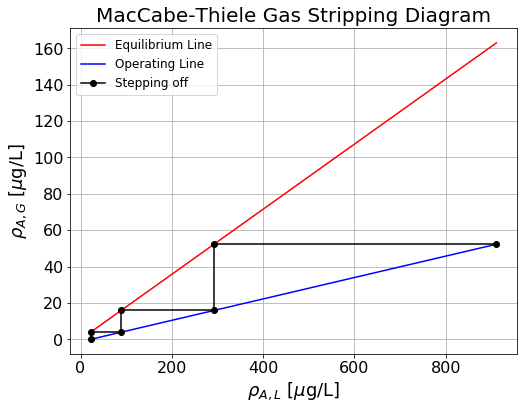

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(1, figsize=(8, 6))

xpts = np.array(xpts)
ypts = np.array(ypts)

# equilibrium line
plt.plot(xpts/(micro_gram/liter), eq_func(xpts)/(micro_gram/liter),'r',label='Equilibrium Line')
# operating line
plt.plot(op_func(ypts)/(micro_gram/liter), ypts/(micro_gram/liter),'b',label='Operating Line')
# network nodes
plt.plot(xpts/(micro_gram/liter), ypts/(micro_gram/liter), 'ko-',label='Stepping off')

plt.xlabel(r'$\rho_{A,L}$ [$\mu$g/L]',fontsize=18)
plt.ylabel(r'$\rho_{A,G}$ [$\mu$g/L]',fontsize=18)
plt.title(r'MacCabe-Thiele Gas Stripping Diagram',fontsize=20)
plt.legend(loc='best',fontsize=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
    
plt.grid()
plt.show()
print('')

Answer to 4:

[2000 EPA Health Effects Notebook for Hazardous Air Pollutants for Ethylidene Dichloride (1,1-Dichloroethane)](https://www.epa.gov/sites/production/files/2016-09/documents/ethylidene-dichloride.pdf)

|**Information** |**Dose**|
|:----------------------|:-------:|
| Volatile organic compound  | -  |
| Acute inhalation exposure to high levels in humans results in central nervous system depression and cardio arrythmias| 105 mg/L |
| EPA classification as Group C, possible human carcinogen | - |
| EPA provisional reference concentration| 0.5 $\mu$g/L |
| Lethal conc. in 50% of population (mice)   | 70 mg/L |
| Lethal conc. in 50% of population (rats)   | 65 mg/L |
| National institute of occupational safety and health (NIOSH) **immediately dangerous** to life or health limit| 12 mg/L |
| NIOSH recommend exposure 8-10 h | 400 $\mu$g/L |